In [13]:
#import all necessary libraries

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib as plt
import seaborn as sns

## Importing and Exploring data

In [18]:
#import data
Data = pd.read_csv("trainfile.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_6068\385507666.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv("trainfile.csv")


In [3]:
Data.head(10)

,row ID,CustomerId,Surname,CreditScore,Geography,Gender,Dependents,Age,Tenure,Balance,Occupation,OwnHouse,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668.0,France,Male,0,33.0,3.0,0.00,student,0.0,2.0,1.0,0,181449.97,0
1,1,15749177,Okwudiliolisa,627.0,France,Male,0,33.0,1.0,0.00,student,0.0,2.0,1.0,1,49503.50,0
2,2,15694510,Hsueh,678.0,France,Male,1,40.0,10.0,0.00,unemployed,1.0,2.0,1.0,0,184866.69,0
3,3,15741417,Kao,581.0,France,Male,2,34.0,2.0,148882.54,student,0.0,1.0,1.0,1,84560.88,0
4,5,15771669,Genovese,588.0,Germany,Male,2,36.0,4.0,131778.58,self employed,1.0,1.0,1.0,0,136024.31,1
5,7,15669611,Chukwuebuka,678.0,Spain,Male,0,37.0,1.0,138476.41,student,0.0,1.0,1.0,0,106851.60,0
6,9,15591721,Cattaneo,583.0,Germany,Male,1,40.0,4.0,81274.33,self employed,1.0,1.0,1.0,1,170843.07,0
7,10,15635097,Fokine,599.0,Germany,Female,1,27.0,6.0,161801.47,student,0.0,2.0,1.0,0,109184.24,0
8,13,15793029,Ts'ai,681.0,France,Male,0,47.0,5.0,0.00,retired,1.0,1.0,1.0,1,72945.68,0
9,14,15643294,Chukwuemeka,703.0,France,Female,0,33.0,7.0,190566.65,student,0.0,1.0,1.0,1,79997.14,0


In [4]:
Data.shape

(184839, 17)

In [5]:
Data.describe()

,CustomerId,CreditScore,Dependents,Age,Tenure,Balance,OwnHouse,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.848390e+05,184839.000000,184839.000000,184839.000000,184839.000000,184839.000000,184675.000000,184839.000000,184689.000000,184839.000000,184839.000000,184839.000000
mean,1.569185e+07,656.542672,1.017978,38.041652,4.985086,54762.528959,0.503512,1.561162,0.753662,0.498482,113827.614029,0.211411
std,7.135536e+04,77.831202,0.874872,8.570119,2.710755,62409.995597,0.499989,0.533197,0.430879,0.499999,50138.006849,0.408310
min,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563321e+07,599.972438,0.000000,32.026540,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,75888.570000,0.000000
50%,1.569016e+07,659.414276,1.000000,37.000000,5.000000,0.000000,1.000000,2.000000,1.000000,0.000000,120512.568000,0.000000
75%,1.575654e+07,709.000000,2.000000,42.000000,7.000000,118897.100000,1.000000,2.000000,1.000000,1.000000,156910.787350,0.000000
max,1.581569e+07,850.000000,4.000000,92.000000,10.000000,250898.090000,1.000000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
Data.isnull().sum()

row ID               0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Dependents           0
Age                  0
Tenure               0
Balance              0
Occupation           0
OwnHouse           164
NumOfProducts        0
HasCrCard          150
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### handling Missing values


In [19]:

#handle missing values using forward fill
Data.fillna(method='ffill', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_6068\2385998886.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data.fillna(method='ffill', inplace=True)


In [20]:
Data.isnull().sum()

row ID             0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Dependents         0
Age                0
Tenure             0
Balance            0
Occupation         0
OwnHouse           0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Feature importance

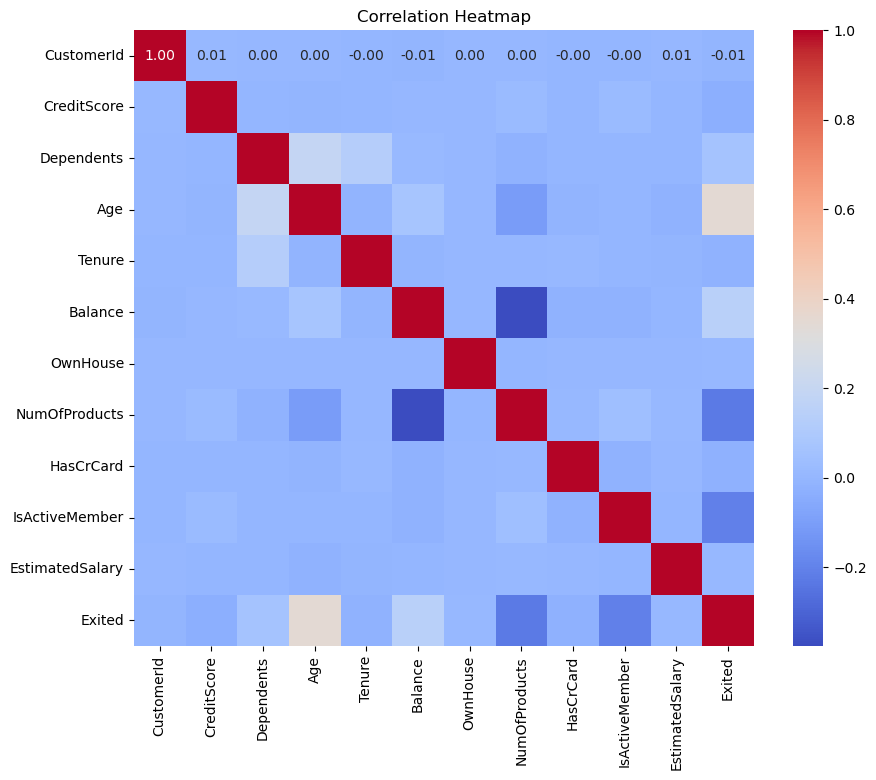

In [21]:
import matplotlib.pyplot as plt
#Corelation matrix

numeric_data = Data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# drop unwanted features
Data = Data.drop(columns =['row ID' ,'CustomerId' , 'Surname',  'Dependents' , 'OwnHouse' ])

Data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,Occupation,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,France,Male,33.0,3.0,0.00,student,2.0,1.0,0,181449.97,0
1,627.0,France,Male,33.0,1.0,0.00,student,2.0,1.0,1,49503.50,0
2,678.0,France,Male,40.0,10.0,0.00,unemployed,2.0,1.0,0,184866.69,0
3,581.0,France,Male,34.0,2.0,148882.54,student,1.0,1.0,1,84560.88,0
4,588.0,Germany,Male,36.0,4.0,131778.58,self employed,1.0,1.0,0,136024.31,1


### encoding

In [23]:
Data_onehot = pd.get_dummies(Data)
Data_onehot.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Occupation_retired,Occupation_self employed,Occupation_student,Occupation_unemployed
0,668.0,33.0,3.0,0.00,2.0,1.0,0,181449.97,0,True,False,False,False,True,False,False,True,False
1,627.0,33.0,1.0,0.00,2.0,1.0,1,49503.50,0,True,False,False,False,True,False,False,True,False
2,678.0,40.0,10.0,0.00,2.0,1.0,0,184866.69,0,True,False,False,False,True,False,False,False,True
3,581.0,34.0,2.0,148882.54,1.0,1.0,1,84560.88,0,True,False,False,False,True,False,False,True,False
4,588.0,36.0,4.0,131778.58,1.0,1.0,0,136024.31,1,False,True,False,False,True,False,True,False,False


In [24]:
Data_onehot = Data_onehot.drop(columns = ['Geography_Spain', 'Gender_Female', 'Occupation_self employed'])

In [26]:
Data_onehot.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Gender_Male,Occupation_retired,Occupation_student,Occupation_unemployed
0,668.0,33.0,3.0,0.00,2.0,1.0,0,181449.97,0,True,False,True,False,True,False
1,627.0,33.0,1.0,0.00,2.0,1.0,1,49503.50,0,True,False,True,False,True,False
2,678.0,40.0,10.0,0.00,2.0,1.0,0,184866.69,0,True,False,True,False,False,True
3,581.0,34.0,2.0,148882.54,1.0,1.0,1,84560.88,0,True,False,True,False,True,False
4,588.0,36.0,4.0,131778.58,1.0,1.0,0,136024.31,1,False,True,True,False,False,False


### Model preparation

In [27]:
#Spliting data into x and Y
X = Data_onehot.loc[:,Data_onehot.columns != 'Exited']
Y = Data_onehot[['Exited']]

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42  )

In [29]:
# Initialize the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=346, random_state=120 , criterion='entropy') #criterion='entropy', 

In [30]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_6068\1927441689.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=346, random_state=120)

### Predictictions

In [31]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8961804804154945


### Submission file for the real text data

In [32]:


#Test Data Check

Data_t = pd.read_csv('testfile.csv')
Data_test = Data_t.drop(columns =['row ID' ,'CustomerId' , 'Surname' , 'Dependents' , 'OwnHouse'])#, 'OwnHouse' 

tX = pd.get_dummies(Data_test)
tX = tX.drop(columns = ['Geography_Spain', 'Gender_Female', 'Occupation_self employed' ])
predict_test = rf_classifier.predict(tX)

#submission file
submission_4 = pd.DataFrame()
submission_4['row ID'] = Data_t['row ID'] 
submission_4["Exited"] = predict_test

submission_4.to_csv("Submission.csv",index = False)

C:\Users\HP\AppData\Local\Temp\ipykernel_6068\2873581807.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_t = pd.read_csv('testfile.csv')
